<a href="https://colab.research.google.com/github/XueqingWu/Interpretable_ML_Classification/blob/main/Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Interpretable ML

Reference: https://github.com/csinva/imodels/blob/master/notebooks/imodels_demo.ipynb

The dataset that is used in this project is the iris dataset from scikitlearn.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
pip install imodels

In [3]:
pip install git+https://github.com/christophM/rulefit.git

  Cloning https://github.com/christophM/rulefit.git to /tmp/pip-req-build-dqt5mevw
  Running command git clone --filter=blob:none --quiet https://github.com/christophM/rulefit.git /tmp/pip-req-build-dqt5mevw
  Resolved https://github.com/christophM/rulefit.git to commit 472b8574b4eb9e565caf1e05ed580998fe2c9a8e
  Preparing metadata (setup.py) ... done


In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import metrics

# installable with: `pip install imodels`
import imodels
from imodels import SLIMClassifier, OneRClassifier, BoostedRulesClassifier, FIGSClassifier, HSTreeClassifierCV
from imodels import SLIMRegressor, BayesianRuleListClassifier, RuleFitRegressor, GreedyRuleListClassifier
from imodels.discretization import ExtraBasicDiscretizer
import demo_helper
np.random.seed(13)

In [5]:
# load dataset
from sklearn.datasets import load_iris

iris = load_iris()
# convert to dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df
# # Subset data to two classes
iris_df = iris_df[iris.target != 2]
iris_df["target"] = iris.target[iris.target != 2]
iris_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [6]:
from sklearn.model_selection import train_test_split

# Assuming iris_df is your DataFrame and target is the column you want to predict
y = iris_df["target"].to_numpy()  # Target variable
X = iris_df.drop("target", axis=1)
features=X.columns
X=X.to_numpy()  # Features as numpy array

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now X_train, X_test, y_train, y_test can be used for training and testing



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Boosted Stumps

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


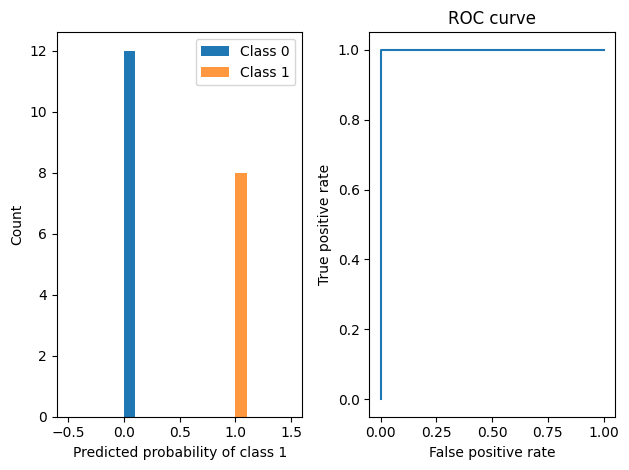

BoostedRulesClassifier(n_estimators=10)

In [7]:
# fit boosted stumps
brc = BoostedRulesClassifier(n_estimators=10)
brc.fit(X_train, y_train, feature_names=features)

# look at performance
probs = brc.predict_proba(X_test)
demo_helper.viz_classification_preds(probs, y_test)

brc

### RuleTrees

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


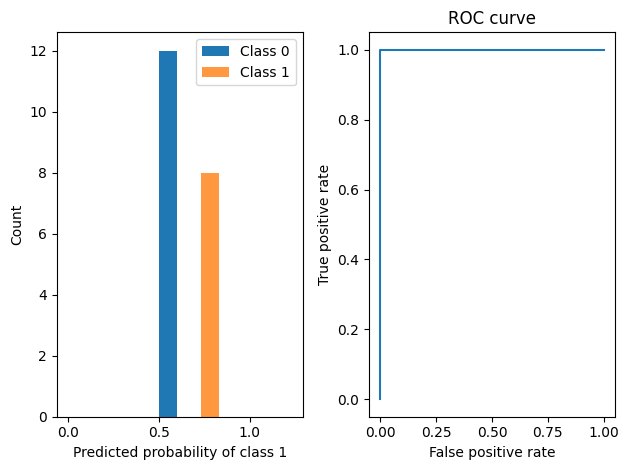

FIGSClassifier(max_rules=7)

In [8]:
# specify a decision tree with a maximum depth
figs = FIGSClassifier(max_rules=7)
figs.fit(X_train, y_train, feature_names=features)

# calculate mse on the training data
probs = figs.predict_proba(X_test)
# print(f'test mse: {np.mean(np.square(preds-y)):0.2f}')
demo_helper.viz_classification_preds(probs, y_test)

figs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Alternative visualization:


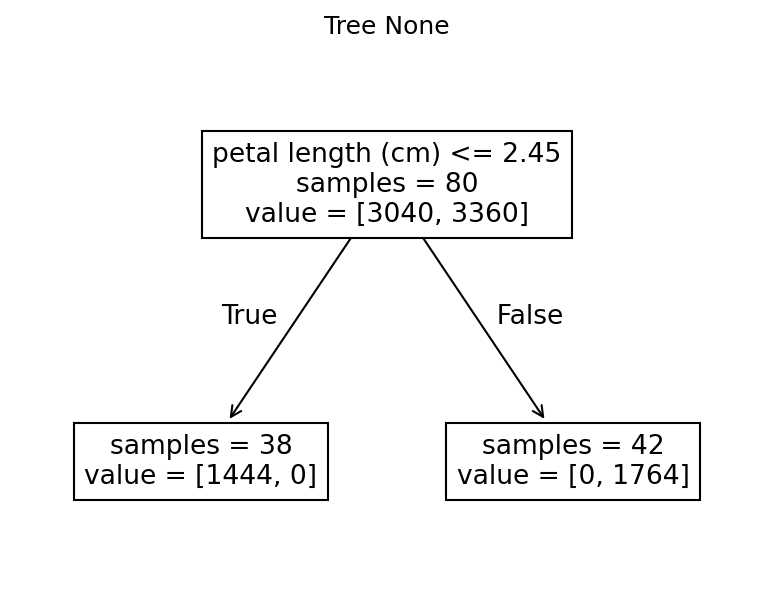

In [9]:
print('Alternative visualization:')
figs.plot()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pr

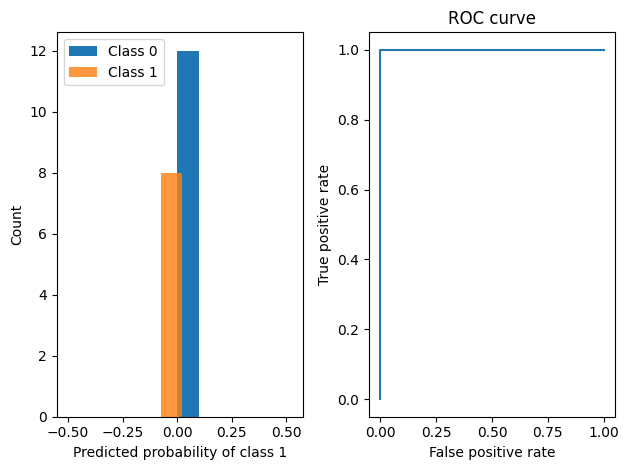

HSTreeClassifierCV(estimator_=DecisionTreeClassifier(max_leaf_nodes=7), reg_param_list=array([0.e+00, 1.e-01, 1.e+00, 1.e+01, 5.e+01, 1.e+02, 5.e+02]), shrinkage_scheme_='node_based', cv=3, scoring=None)

In [10]:
# specify a decision tree with a maximum depth
dt = HSTreeClassifierCV(max_leaf_nodes=7)
dt.fit(X_train, y_train, feature_names=features)

# calculate mse on the training data
probs = dt.predict_proba(X_test)
# print(f'test mse: {np.mean(np.square(preds-y)):0.2f}')
demo_helper.viz_classification_preds(probs, y_test)

dt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Alternative visualization:


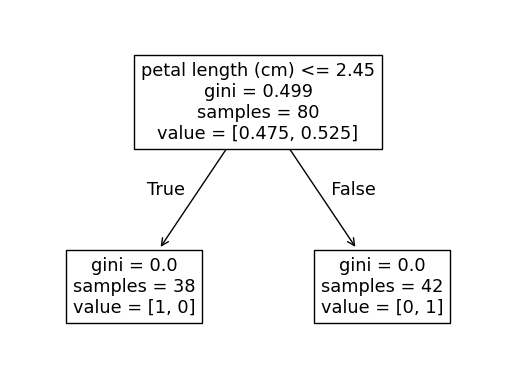

In [11]:
print('Alternative visualization:')
plot_tree(dt.estimator_, feature_names=features)
# plt.savefig('tree.pdf')
plt.show()

### Greedy Rule Lists

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


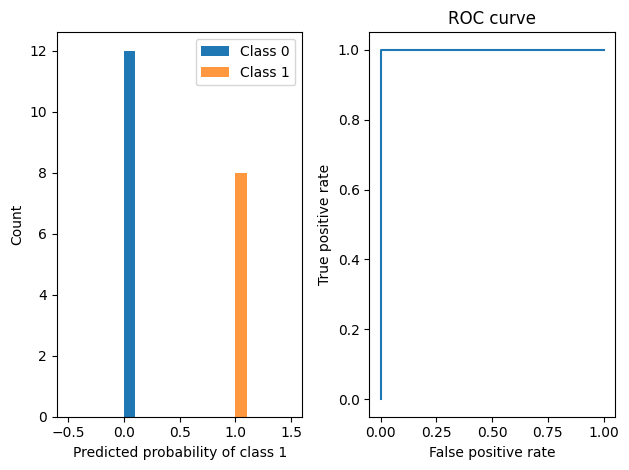

GreedyRuleListClassifier()

In [12]:
# fit a greedy rule list
m = GreedyRuleListClassifier()
m.fit(X_train, y=y_train, feature_names=features)  # stores into m.rules_
probs = m.predict_proba(X_test)

# look at prediction breakdown
demo_helper.viz_classification_preds(probs, y_test)

m

### OneR

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


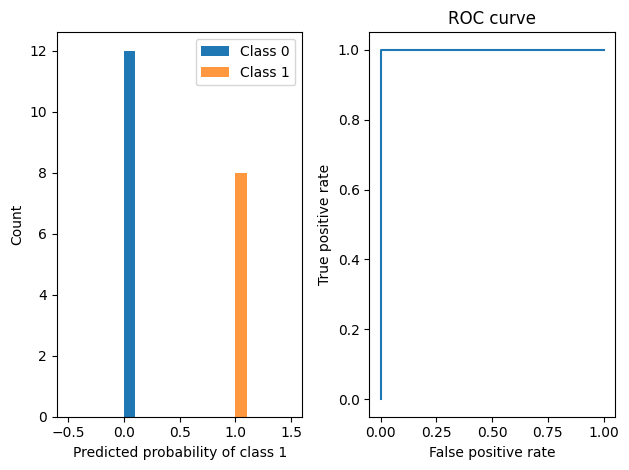

OneRClassifier()

In [13]:
# fit a oneR model
m = OneRClassifier()
m.fit(X_train, y=y_train, feature_names=features)  # stores into m.rules_
probs = m.predict_proba(X_test)

# look at prediction breakdown
demo_helper.viz_classification_preds(probs, y_test)

m